In [1]:
import requests
from bs4 import BeautifulSoup
import reverse_geocode
import folium
from geopy.geocoders import Nominatim
import numpy as np
import matplotlib as mpl
import pandas as pd
from sklearn import datasets
import geocoder
from geopy.exc import GeocoderTimedOut
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

In [2]:
Raleigh_Neighborhoods=[]
response_obj=requests.get('https://en.wikipedia.org/wiki/Category:Neighborhoods_in_Raleigh,_North_Carolina').text
soup=BeautifulSoup(response_obj,'lxml')
mydivs = soup.findAll("div", {"class": "mw-category-group"})
for div in mydivs:
    for l in div.findAll('a'):
        for title in l:
            Raleigh_Neighborhoods.append(title)
Raleigh_Neighborhoods.remove('Raleigh, North Carolina neighborhoods')
Raleigh_Neighborhoods=[s.replace('Historic District','') for s in Raleigh_Neighborhoods]
Raleigh_Neighborhoods=[s.replace('(North Carolina)','') for s in Raleigh_Neighborhoods]
Raleigh_Neighborhoods=[s.replace('(Raleigh, North Carolina)','') for s in Raleigh_Neighborhoods]
Raleigh_Neighborhoods=[s.strip(' ') for s in Raleigh_Neighborhoods]
Raleigh_Neighborhoods=[s+(',Raleigh, North Carolina') for s in Raleigh_Neighborhoods]

In [3]:
df_ral=pd.DataFrame(Raleigh_Neighborhoods)
df_ral=df_ral.rename(columns={0:'Neighborhoods'})
df_ral=df_ral.drop_duplicates(keep='first')
df_ral

,Neighborhoods
0,"Battery Heights,Raleigh, North Carolina"
1,"Bloomsbury,Raleigh, North Carolina"
2,"Boylan Heights,Raleigh, North Carolina"
3,"Cameron Park,Raleigh, North Carolina"
4,"Cameron Village,Raleigh, North Carolina"
6,"Capitol Area,Raleigh, North Carolina"
7,"Capitol Heights,Raleigh, North Carolina"
8,Centennial Campus of North Carolina State Univ...
9,"Depot,Raleigh, North Carolina"
10,"East Raleigh–South Park,Raleigh, North Carolina"


In [4]:
geolocator=Nominatim(user_agent='Raleigh')
city=[]
lat=[]
long=[]
try:
    for i in Raleigh_Neighborhoods:
        location = geolocator.geocode(i)
        if location is not None:
            city.append(i)
            lat.append(location.latitude)
            long.append(location.longitude)
except GeocoderTimedOut as e:
    print("Error: geocode failed on input %s with message %s"%(location, e.msg))

In [5]:
df=pd.DataFrame({'Neighborhoods':city,'latitude':lat,'longitude':long})

In [6]:
df=df.drop_duplicates(subset='latitude',keep='first')

In [7]:
df

,Neighborhoods,latitude,longitude
0,"Battery Heights,Raleigh, North Carolina",35.777058,-78.617563
1,"Bloomsbury,Raleigh, North Carolina",35.808897,-78.648599
2,"Boylan Heights,Raleigh, North Carolina",35.774159,-78.652102
3,"Cameron Park,Raleigh, North Carolina",35.785779,-78.655470
4,"Cameron Village,Raleigh, North Carolina",35.790361,-78.660413
6,"Capitol Area,Raleigh, North Carolina",35.789884,-78.621851
8,"Depot,Raleigh, North Carolina",35.780398,-78.639099
9,"Fayetteville Street (Raleigh),Raleigh, North C...",35.768875,-78.641336
11,"Glenwood Avenue,Raleigh, North Carolina",35.886724,-78.744499
12,"Hayes Barton,Raleigh, North Carolina",35.802755,-78.646583


In [8]:
# NorthwestRaleigh,Raleigh,NC,35.8592131,-78.7820008
# North Raleigh,Raleigh,NC,35.9103757,-78.6801222,12
# NortheastRaleigh,Raleigh,NC,35.8497131,-78.6123274
# SouthwestRaleigh,Raleigh,NC,35.7673757,-78.7586629
# SoutheastRaleigh,Raleigh,NC,35.7520018,-78.6401082
# EastRaleigh,Raleigh,NC,35.7924627,-78.6189683
# raleigh=['North Raleigh,Raleigh,nc','Southwest raleigh,Raleigh,nc','Southeast raleigh,Raleigh,nc'
#         ,'east raleigh,Raleigh,nc']
# raliegh_side=[]
# lat=[]
# long=[]
# try:
#     for i in raleigh:
#         location = geolocator.geocode(i)
#         if location is not None:
#             raliegh_side.append(i)
#             lat.append(location.latitude)
#             long.append(location.longitude)
# except GeocoderTimedOut as e:
#     print("Error: geocode failed on input %s with message %s"%(location, e.msg))
# df_ral=pd.DataFrame({'Raleigh_Side':raliegh_side,'latitude':lat,'longitude':long})
# df_ral
raleigh=['Northwest Raleigh,Raleigh,NC','North Raleigh,Raleigh,NC','Northeast Raleigh,Raleigh,NC',
              'Southwest Raleigh,Raleigh,NC','Southeast Raleigh,Raleigh,NC','East Raleigh,Raleigh,NC','West Raleigh,Raleigh,NC']
raleigh_lat=[35.8592131,35.9103757,35.8497131,35.7673757,35.7520018,35.7924627,35.7868173]
raleigh_long=[-78.7820008,-78.6801222,-78.6123274,-78.7586629,-78.6401082,-78.6189683,-78.6726475]

df_ral = pd.DataFrame(list(zip(raleigh, raleigh_lat,raleigh_long)), 
               columns =['Raleigh_Side', 'latitude','longitude']) 
df_ral

,Raleigh_Side,latitude,longitude
0,"Northwest Raleigh,Raleigh,NC",35.859213,-78.782001
1,"North Raleigh,Raleigh,NC",35.910376,-78.680122
2,"Northeast Raleigh,Raleigh,NC",35.849713,-78.612327
3,"Southwest Raleigh,Raleigh,NC",35.767376,-78.758663
4,"Southeast Raleigh,Raleigh,NC",35.752002,-78.640108
5,"East Raleigh,Raleigh,NC",35.792463,-78.618968
6,"West Raleigh,Raleigh,NC",35.786817,-78.672647


In [9]:
CLIENT_ID = 'EA0WZQZP3HJVT4DTV02NLEGNIFSAHPTRXK50TAZIIYY5A5OG' # your Foursquare ID
CLIENT_SECRET = '5X1OY3KPXNEM1F5CVU2A124DQUNH3GC0TDP1MP1M0FX31D1Z' # your Foursquare Secret

# CLIENT_ID ='BCZ1DKRCRZTMRZPSY5HHEQTQJNZCITUWFO3CLRCIUQOOGSFB'
# CLIENT_SECRET ='WPWOCZ3QZVXYQCXPKBPKSKW1CQSFBLTKAWYGSS0WBXJKZZZW'
VERSION = '20190104'
LIMIT = 50
radius= 5000
latitude = 35.787743
longitude = -78.644257
search_query='Restaurants'
restID=[]
restName=[]
restCity=[]
restLat=[]
restLng=[]
restCat=[]

In [10]:
# url1 = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude,longitude,VERSION,search_query,radius,LIMIT)
# results = requests.get(url1).json()
# r=results['response']['groups'][0]['items']
# for a in range(len(r)):
#      print(r[a]['venue']['name'],r[a]['venue']['name'])

In [11]:
# for lat ,lng in zip(df_ral['latitude'],df_ral['longitude']):  
#     url1 = 'https://api.foursquare.com/v2/venues/timeseries?client_id={}&client_secret={}&ll={},{}&v={}'.format(CLIENT_ID, CLIENT_SECRET, lat,lng, VERSION)
#     results = requests.get(url1).json()
#     print(results)

In [12]:
restCity_Lat=[]
restCity_Lng=[]
restName_Ral=[]
restCity_Ral=[]
restLat_Ral=[]
restLng_Ral=[]
restCat_Ral=[]
for neigh,lat ,lng in zip(df_ral['Raleigh_Side'],df_ral['latitude'],df_ral['longitude']):  
    url1 = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat,lng,VERSION,search_query,radius,LIMIT)
    results = requests.get(url1).json()
    r=results['response']['groups'][0]['items']
    for a in range(len(r)):   
        restCity_Ral.append(neigh)
        restCity_Lat.append(lat)
        restCity_Lng.append(lng)
        restName_Ral.append(r[a]['venue']['name'])
        restCat_Ral.append(r[a]['venue']['categories'][0]['name'])
        restLat_Ral.append(r[a]['venue']['location']['lat'])
        restLng_Ral.append(r[a]['venue']['location']['lng'])

#print(neigh,r[a]['venue']['name'],r[a]['venue']['categories'][0]['name'],r[a]['venue']['location']['lat'],r[a]['venue']['location']['lng'])

In [13]:
final_Ral=pd.DataFrame(list(zip(restCity_Ral,restCity_Lat,restCity_Lng,restName_Ral,restCat_Ral,restLat_Ral,restLng_Ral)),columns=['Neighbourhood','Neigh_Lat','Neigh_Lng','Venue','Venue_Category','Latitude','Longitude'])
final_Ral.Neighbourhood.value_counts()
final_Ral

,Neighbourhood,Neigh_Lat,Neigh_Lng,Venue,Venue_Category,Latitude,Longitude
0,"Northwest Raleigh,Raleigh,NC",35.859213,-78.782001,Dame's Chicken & Waffles,American Restaurant,35.830637,-78.769707
1,"Northwest Raleigh,Raleigh,NC",35.859213,-78.782001,Los Tres Magueyes,Mexican Restaurant,35.859641,-78.820235
2,"Northwest Raleigh,Raleigh,NC",35.859213,-78.782001,Herons,New American Restaurant,35.829642,-78.764002
3,"Northwest Raleigh,Raleigh,NC",35.859213,-78.782001,Peng's Asian Cuisine,Chinese Restaurant,35.862487,-78.818379
4,"Northwest Raleigh,Raleigh,NC",35.859213,-78.782001,Chick-fil-A,Fast Food Restaurant,35.829273,-78.769781
...,...,...,...,...,...,...,...
345,"West Raleigh,Raleigh,NC",35.786817,-78.672647,Jersey Mike's Subs,Sandwich Place,35.788600,-78.641946
346,"West Raleigh,Raleigh,NC",35.786817,-78.672647,Taverna Agora,Greek Restaurant,35.780776,-78.644406
347,"West Raleigh,Raleigh,NC",35.786817,-78.672647,Piccola Italia,Italian Restaurant,35.790066,-78.659474
348,"West Raleigh,Raleigh,NC",35.786817,-78.672647,José and Sons,Mexican Restaurant,35.775410,-78.644782


In [14]:
final_Ral.groupby(['Venue_Category']).count()

,Neighbourhood,Neigh_Lat,Neigh_Lng,Venue,Latitude,Longitude
Venue_Category,,,,,,
American Restaurant,34,34,34,34,34,34
Asian Restaurant,9,9,9,9,9,9
BBQ Joint,5,5,5,5,5,5
Bagel Shop,2,2,2,2,2,2
Bakery,11,11,11,11,11,11
Breakfast Spot,9,9,9,9,9,9
Burger Joint,17,17,17,17,17,17
Burrito Place,1,1,1,1,1,1
Café,14,14,14,14,14,14


In [15]:
# for neigh,lat ,lng in zip(df['Neighborhoods'],df['latitude'],df['longitude']):  
#     url1 = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat,lng,VERSION,search_query,radius,LIMIT)
#     results = requests.get(url1).json()
#     r=results['response']['groups'][0]['items']
#     for a in range(len(r)):
#         restCity.append(neigh)
#         restName.append(r[a]['venue']['name'])
#         restCat.append(r[a]['venue']['categories'][0]['name'])
#         restLat.append(r[a]['venue']['location']['lat'])
#         restLng.append(r[a]['venue']['location']['lng'])        
#         #print(neigh,r[a]['venue']['name'],r[a]['venue']['categories'][0]['name'],r[a]['venue']['location']['lat'],r[a]['venue']['location']['lng'])
#         #print(r[a]['venue']['name'],r[a]['venue']['categories'][0]['name'],r[a]['venue'])
         

In [16]:
# final=pd.DataFrame(list(zip(restCity,restName,restCat,restLat,restLng)),columns=['Neighbourhood','Name','Category','Latitude','Longitude'])
# final.sort_values(by=['Name'])
# final.shape

In [17]:
ral_lat=35.787743
ral_long=-78.644257
map_restaurants=folium.Map(location=[ral_lat,ral_long],zoom_start=11,tiles="openstreetmap")

In [18]:
x=np.arange(len(raleigh))
rainbow=["#00ff00","#ff00ff","#0000ff","#ffa500","#ff0000","#ff00bb"]
final_Ral.head(5)

,Neighbourhood,Neigh_Lat,Neigh_Lng,Venue,Venue_Category,Latitude,Longitude
0,"Northwest Raleigh,Raleigh,NC",35.859213,-78.782001,Dame's Chicken & Waffles,American Restaurant,35.830637,-78.769707
1,"Northwest Raleigh,Raleigh,NC",35.859213,-78.782001,Los Tres Magueyes,Mexican Restaurant,35.859641,-78.820235
2,"Northwest Raleigh,Raleigh,NC",35.859213,-78.782001,Herons,New American Restaurant,35.829642,-78.764002
3,"Northwest Raleigh,Raleigh,NC",35.859213,-78.782001,Peng's Asian Cuisine,Chinese Restaurant,35.862487,-78.818379
4,"Northwest Raleigh,Raleigh,NC",35.859213,-78.782001,Chick-fil-A,Fast Food Restaurant,35.829273,-78.769781


In [19]:
for lat,long,poi,distr in zip(final_Ral['Latitude'],final_Ral['Longitude'],
                              final_Ral['Venue_Category'],final_Ral['Neighbourhood']):
    label=folium.Popup(str(poi) + ' ' + str(distr), parse_html=True)
    folium.CircleMarker(
        [lat,long],
        radius = 7,
        popup=label,
        color=rainbow[raleigh.index(distr)-1],
        fill=True,
        fill_color=rainbow[raleigh.index(distr)-1],
        fill_opacity=0.3).add_to(map_restaurants)
    
map_restaurants

In [20]:
### Number of Unique Categories in the Dataframe 
print('There are {} unique categories.'.format(len(final_Ral['Venue_Category'].unique())))
## We can check some of the categories randomly  
print (final_Ral[['Venue_Category']][11:20])
final_Ral['Venue_Category'].value_counts()

There are 53 unique categories.
         Venue_Category
11    Indian Restaurant
12   Seafood Restaurant
13       Sandwich Place
14  American Restaurant
15     Sushi Restaurant
16           Steakhouse
17  American Restaurant
18           Steakhouse
19           Food Truck


American Restaurant                34
Mexican Restaurant                 27
Pizza Place                        25
Burger Joint                       17
Mediterranean Restaurant           16
Fast Food Restaurant               14
Café                               14
Steakhouse                         12
Restaurant                         12
Italian Restaurant                 12
Seafood Restaurant                 11
Bakery                             11
Sushi Restaurant                   10
Sandwich Place                     10
Asian Restaurant                    9
Breakfast Spot                      9
Deli / Bodega                       7
Southern / Soul Food Restaurant     7
Japanese Restaurant                 6
Indian Restaurant                   6
Food Truck                          6
Chinese Restaurant                  6
Donut Shop                          6
BBQ Joint                           5
Hot Dog Joint                       5
Gastropub                           5
Greek Restau

In [21]:
final_Ral_clusters_top10=final_Ral['Venue_Category'].value_counts()[0:10].to_frame(name='frequency')
final_Ral_clusters_top10=final_Ral_clusters_top10.reset_index()
final_Ral_clusters_top10.rename(index=str,columns={"index":"Venue_Category","frequency":"frequency"},inplace=True)
final_Ral_clusters_top10
# add clustering labels

# District_top10_venues_sorted.insert(0, 'Cluster Label', kmeans.labels_)

# Tokyo_5_Dist_Coordinate_Cluster_merged = Tokyo_df_selected_final

# #merge the inital Tokyo Dataframe with Sorted Most Visited places for each neighborhood

# Tokyo_5_Dist_Coordinate_Cluster_merged = Tokyo_5_Dist_Coordinate_Cluster_merged.join \
#                                         (District_top10_venues_sorted.set_index('District'), on='Major_District')

# Tokyo_5_Dist_Coordinate_Cluster_merged.head()

,Venue_Category,frequency
0,American Restaurant,34
1,Mexican Restaurant,27
2,Pizza Place,25
3,Burger Joint,17
4,Mediterranean Restaurant,16
5,Fast Food Restaurant,14
6,Café,14
7,Steakhouse,12
8,Restaurant,12
9,Italian Restaurant,12


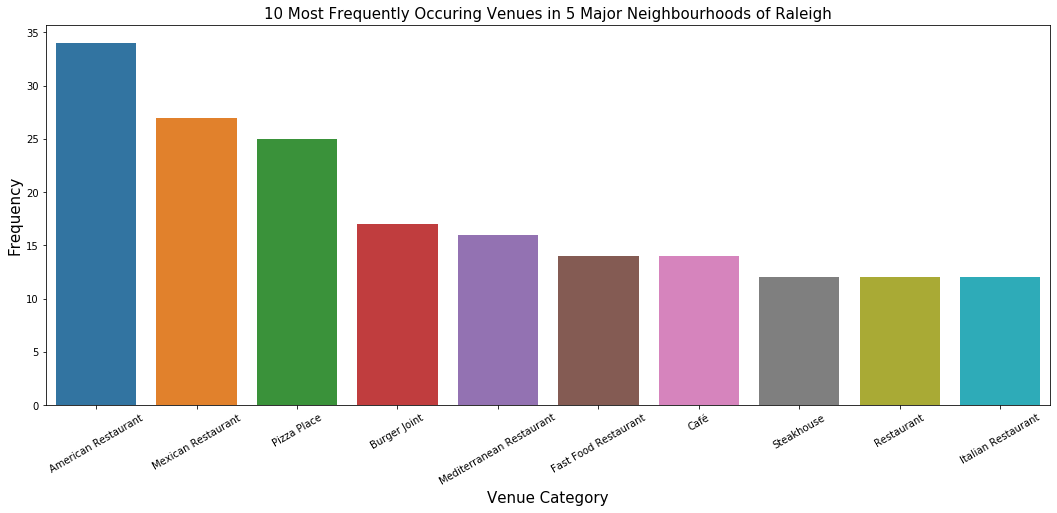

In [22]:
import seaborn as sns
fig = plt.figure(figsize=(18,7))
s=sns.barplot(x="Venue_Category", y="frequency", data=final_Ral_clusters_top10)
s.set_xticklabels(s.get_xticklabels(), rotation=30)
plt.title('10 Most Frequently Occuring Venues in 5 Major Neighbourhoods of Raleigh', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues.png", dpi=300)
plt.show()

In [23]:
final_Ral_onehot=pd.get_dummies(final_Ral[['Venue_Category']],prefix="",prefix_sep="")
final_Ral_onehot['Neighbourhood']=final_Ral['Neighbourhood']
fixed_cols= [final_Ral_onehot.columns[-1]] + list(final_Ral_onehot.columns[:-1])
final_Ral_onehot=final_Ral_onehot[fixed_cols]

In [24]:
final_Ral_onehot_grouped=final_Ral_onehot.groupby('Neighbourhood').mean().reset_index()
final_Ral_onehot_grouped.index=np.arange(1,len(final_Ral_onehot_grouped)+1)
final_Ral_onehot_grouped

,Neighbourhood,American Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Breakfast Spot,Burger Joint,Burrito Place,Café,...,Southern / Soul Food Restaurant,Steakhouse,Sushi Restaurant,Taco Place,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
1,"East Raleigh,Raleigh,NC",0.10,0.04,0.02,0.00,0.08,0.04,0.04,0.00,0.04,...,0.06,0.02,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,"North Raleigh,Raleigh,NC",0.02,0.04,0.00,0.04,0.04,0.02,0.04,0.00,0.08,...,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,"Northeast Raleigh,Raleigh,NC",0.16,0.02,0.02,0.00,0.00,0.02,0.08,0.00,0.02,...,0.00,0.02,0.02,0.02,0.00,0.02,0.02,0.00,0.00,0.02
4,"Northwest Raleigh,Raleigh,NC",0.12,0.00,0.00,0.00,0.00,0.02,0.04,0.00,0.04,...,0.00,0.08,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,"Southeast Raleigh,Raleigh,NC",0.14,0.06,0.04,0.00,0.04,0.02,0.06,0.00,0.02,...,0.06,0.02,0.04,0.00,0.02,0.00,0.00,0.00,0.02,0.00
6,"Southwest Raleigh,Raleigh,NC",0.06,0.02,0.02,0.00,0.04,0.02,0.04,0.00,0.02,...,0.00,0.04,0.02,0.00,0.00,0.00,0.00,0.02,0.00,0.02
7,"West Raleigh,Raleigh,NC",0.08,0.00,0.00,0.00,0.02,0.04,0.04,0.02,0.06,...,0.02,0.02,0.06,0.02,0.00,0.00,0.00,0.00,0.00,0.00


In [25]:
top_ven=5
for places in final_Ral_onehot_grouped['Neighbourhood']:
    print("%%%%%"+places+"%%%%%")
    temp=final_Ral_onehot_grouped[final_Ral_onehot_grouped['Neighbourhood']==places].T.reset_index()
    temp.columns=['Venue','Freq']
    temp=temp.iloc[1:]
    temp['Freq']=temp['Freq'].astype(float)
    print(temp.sort_values('Freq',ascending=False).reset_index(drop=True).head(top_ven))
    print('\n')

%%%%%East Raleigh,Raleigh,NC%%%%%
                             Venue  Freq
0              American Restaurant  0.10
1                           Bakery  0.08
2                      Pizza Place  0.06
3  Southern / Soul Food Restaurant  0.06
4                        Gastropub  0.06


%%%%%North Raleigh,Raleigh,NC%%%%%
                Venue  Freq
0         Pizza Place  0.20
1  Mexican Restaurant  0.12
2                Café  0.08
3          Donut Shop  0.06
4  Italian Restaurant  0.04


%%%%%Northeast Raleigh,Raleigh,NC%%%%%
                  Venue  Freq
0   American Restaurant  0.16
1  Fast Food Restaurant  0.08
2    Mexican Restaurant  0.08
3          Burger Joint  0.08
4           Pizza Place  0.06


%%%%%Northwest Raleigh,Raleigh,NC%%%%%
                  Venue  Freq
0   American Restaurant  0.12
1            Steakhouse  0.08
2           Pizza Place  0.08
3    Mexican Restaurant  0.08
4  Fast Food Restaurant  0.06


%%%%%Southeast Raleigh,Raleigh,NC%%%%%
                 Venue  Freq
0  

In [26]:
## Define a Function to select the top 10 rows (According to the Values) 

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Neighbourhood_top10_venues_sorted = pd.DataFrame(columns=columns)
Neighbourhood_top10_venues_sorted['Neighbourhood'] = final_Ral_onehot_grouped['Neighbourhood']

for ind in np.arange(final_Ral_onehot_grouped.shape[0]):
    Neighbourhood_top10_venues_sorted.iloc[ind, 1:] = return_most_common_venues(final_Ral_onehot_grouped.iloc[ind, :], num_top_venues)

    
Neighbourhood_top10_venues_sorted.index = np.arange(1, len(Neighbourhood_top10_venues_sorted)+1)
Neighbourhood_top10_venues_sorted.head(10)

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,"East Raleigh,Raleigh,NC",American Restaurant,Bakery,Gastropub,Pizza Place,Southern / Soul Food Restaurant,Mediterranean Restaurant,Italian Restaurant,Café,Burger Joint,Hot Dog Joint
2,"North Raleigh,Raleigh,NC",Pizza Place,Mexican Restaurant,Café,Donut Shop,Mediterranean Restaurant,Asian Restaurant,Bagel Shop,Bakery,Japanese Restaurant,Burger Joint
3,"Northeast Raleigh,Raleigh,NC",American Restaurant,Burger Joint,Mexican Restaurant,Fast Food Restaurant,Pizza Place,Caribbean Restaurant,Seafood Restaurant,French Restaurant,Restaurant,Italian Restaurant
4,"Northwest Raleigh,Raleigh,NC",American Restaurant,Steakhouse,Mexican Restaurant,Pizza Place,Fast Food Restaurant,Restaurant,Sandwich Place,Indian Restaurant,New American Restaurant,Seafood Restaurant
5,"Southeast Raleigh,Raleigh,NC",American Restaurant,Seafood Restaurant,Italian Restaurant,Burger Joint,Southern / Soul Food Restaurant,Asian Restaurant,Gastropub,Bakery,Sushi Restaurant,Mexican Restaurant
6,"Southwest Raleigh,Raleigh,NC",Mexican Restaurant,Mediterranean Restaurant,American Restaurant,Japanese Restaurant,Restaurant,Sandwich Place,Burger Joint,Steakhouse,Chinese Restaurant,Bakery
7,"West Raleigh,Raleigh,NC",Mediterranean Restaurant,Mexican Restaurant,American Restaurant,Café,Sushi Restaurant,Breakfast Spot,Burger Joint,Hot Dog Joint,Pizza Place,Food Truck


[26, 20, 35, 27, 32, 29, 28]


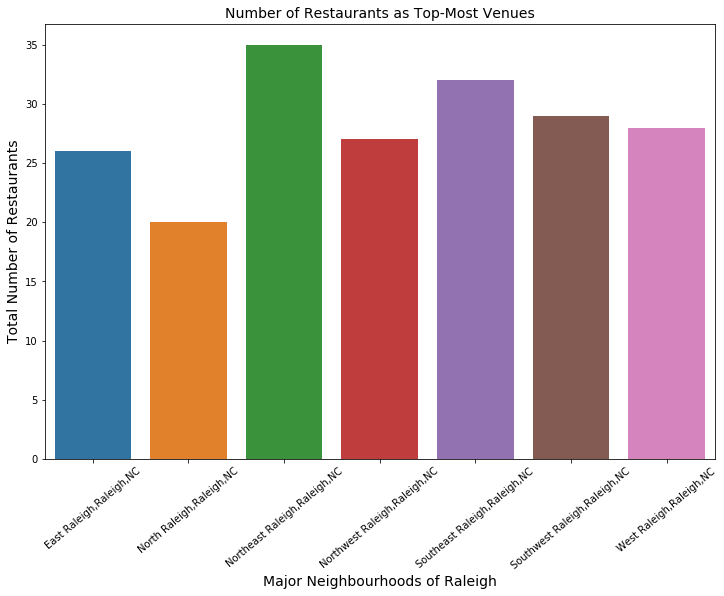

In [27]:
#try groupby to play with restaurant 
Raleigh_Neigh_Venues_restaurant = final_Ral.groupby(['Neighbourhood'])['Venue_Category'].apply(lambda x: x[x.str.contains('Restaurant')].count())
Raleigh_Neigh_Venues_restaurant = Raleigh_Neigh_Venues_restaurant.to_frame().reset_index()
Raleigh_Neigh_Venues_restaurant.columns = ['Neighbourhood', 'Number of Restaurant']

Raleigh_Neigh_Venues_restaurant.index = np.arange(1, len(Raleigh_Neigh_Venues_restaurant)+1)

list_rest_no = Raleigh_Neigh_Venues_restaurant['Number of Restaurant'].to_list()
print (list_rest_no)
fig = plt.figure(figsize=(12,8))
bar = sns.barplot(x='Neighbourhood', y='Number of Restaurant', data=Raleigh_Neigh_Venues_restaurant)

bar.set_ylabel("Total Number of Restaurants", fontsize=14)
bar.set_xlabel("Major Neighbourhoods of Raleigh", fontsize=14)
bar.set_xticklabels(bar.get_xticklabels(),rotation=40)
bar.set_title("Number of Restaurants as Top-Most Venues", fontsize=14)
#plt.savefig("No_of_Rest_as_Top_Venues.png", dpi=240)
plt.show()

In [44]:
kclusters=3
final_Ral_cluster=final_Ral_onehot_grouped.drop('Neighbourhood',1)
kmeans = KMeans(n_clusters=kclusters,random_state=0).fit(final_Ral_cluster)
print("Check the 5 cluster lables :", kmeans.labels_[0:7])

Check the 5 cluster lables : [1 0 2 2 1 2 2]


In [45]:
# add clustering labels

#Neighbourhood_top10_venues_sorted.insert(0, 'Cluster Label', kmeans.labels_)

Raliegh_Neighbourhood_merged = df_ral

#merge the inital Tokyo Dataframe with Sorted Most Visited places for each neighborhood

Raliegh_Neighbourhood_merged = Raliegh_Neighbourhood_merged.join \
                                         (Neighbourhood_top10_venues_sorted.set_index('Neighbourhood'), on='Raleigh_Side')
#final_Ral.head(5)
Raliegh_Neighbourhood_merged.head(100)


,Raleigh_Side,latitude,longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Northwest Raleigh,Raleigh,NC",35.859213,-78.782001,2,American Restaurant,Steakhouse,Mexican Restaurant,Pizza Place,Fast Food Restaurant,Restaurant,Sandwich Place,Indian Restaurant,New American Restaurant,Seafood Restaurant
1,"North Raleigh,Raleigh,NC",35.910376,-78.680122,0,Pizza Place,Mexican Restaurant,Café,Donut Shop,Mediterranean Restaurant,Asian Restaurant,Bagel Shop,Bakery,Japanese Restaurant,Burger Joint
2,"Northeast Raleigh,Raleigh,NC",35.849713,-78.612327,2,American Restaurant,Burger Joint,Mexican Restaurant,Fast Food Restaurant,Pizza Place,Caribbean Restaurant,Seafood Restaurant,French Restaurant,Restaurant,Italian Restaurant
3,"Southwest Raleigh,Raleigh,NC",35.767376,-78.758663,2,Mexican Restaurant,Mediterranean Restaurant,American Restaurant,Japanese Restaurant,Restaurant,Sandwich Place,Burger Joint,Steakhouse,Chinese Restaurant,Bakery
4,"Southeast Raleigh,Raleigh,NC",35.752002,-78.640108,1,American Restaurant,Seafood Restaurant,Italian Restaurant,Burger Joint,Southern / Soul Food Restaurant,Asian Restaurant,Gastropub,Bakery,Sushi Restaurant,Mexican Restaurant
5,"East Raleigh,Raleigh,NC",35.792463,-78.618968,1,American Restaurant,Bakery,Gastropub,Pizza Place,Southern / Soul Food Restaurant,Mediterranean Restaurant,Italian Restaurant,Café,Burger Joint,Hot Dog Joint
6,"West Raleigh,Raleigh,NC",35.786817,-78.672647,2,Mediterranean Restaurant,Mexican Restaurant,American Restaurant,Café,Sushi Restaurant,Breakfast Spot,Burger Joint,Hot Dog Joint,Pizza Place,Food Truck


In [46]:
# create map
map_restaurants10 = folium.Map(location=[ral_lat, ral_long], tiles='cartodbpositron', 
                               attr="<a href=https://github.com/python-visualization/folium/>Folium</a>")

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
#rainbow = ['#00ff00', '#ff00ff','#0000ff','#ffa500' ,'#ff0000']
Neighbourhoods = raleigh

# add markers to the map Neigh_Lat	Neigh_Lng
for lat, lon, poi, cluster in zip(Raliegh_Neighbourhood_merged['latitude'], 
                                  Raliegh_Neighbourhood_merged['longitude'], 
                                  Raliegh_Neighbourhood_merged['Raleigh_Side'], 
                                  Raliegh_Neighbourhood_merged['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=list_rest_no[Neighbourhoods.index(poi)]*0.5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_restaurants10)
       
map_restaurants10


In [47]:
Raleigh_Cluster1 = Raliegh_Neighbourhood_merged.loc[Raliegh_Neighbourhood_merged['Cluster Label'] == 0, 
                                    Raliegh_Neighbourhood_merged.columns[[3] + list(range(4, Raliegh_Neighbourhood_merged.shape[1]))]]
print ("No of Neighbourhood in Cluster Label 0: %d" %(Raleigh_Cluster1.shape[0]))
Raleigh_Cluster1


No of Neighbourhood in Cluster Label 0: 1


,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,0,Pizza Place,Mexican Restaurant,Café,Donut Shop,Mediterranean Restaurant,Asian Restaurant,Bagel Shop,Bakery,Japanese Restaurant,Burger Joint


In [48]:

Raleigh_Cluster2 = Raliegh_Neighbourhood_merged.loc[Raliegh_Neighbourhood_merged['Cluster Label'] == 1, 
                                    Raliegh_Neighbourhood_merged.columns[[3] + list(range(4, Raliegh_Neighbourhood_merged.shape[1]))]]
print ("No of Neighbourhood in Cluster Label 1: %d" %(Raleigh_Cluster2.shape[0]))
Raleigh_Cluster2

No of Neighbourhood in Cluster Label 1: 2


,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,1,American Restaurant,Seafood Restaurant,Italian Restaurant,Burger Joint,Southern / Soul Food Restaurant,Asian Restaurant,Gastropub,Bakery,Sushi Restaurant,Mexican Restaurant
5,1,American Restaurant,Bakery,Gastropub,Pizza Place,Southern / Soul Food Restaurant,Mediterranean Restaurant,Italian Restaurant,Café,Burger Joint,Hot Dog Joint


In [50]:
Raleigh_Cluster3 = Raliegh_Neighbourhood_merged.loc[Raliegh_Neighbourhood_merged['Cluster Label'] == 2, 
                                    Raliegh_Neighbourhood_merged.columns[[3] + list(range(4, Raliegh_Neighbourhood_merged.shape[1]))]]
print ("No of Neighbourhood in Cluster Label 2: %d" %(Raleigh_Cluster3.shape[0]))
Raleigh_Cluster3

No of Neighbourhood in Cluster Label 2: 4


,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,2,American Restaurant,Steakhouse,Mexican Restaurant,Pizza Place,Fast Food Restaurant,Restaurant,Sandwich Place,Indian Restaurant,New American Restaurant,Seafood Restaurant
2,2,American Restaurant,Burger Joint,Mexican Restaurant,Fast Food Restaurant,Pizza Place,Caribbean Restaurant,Seafood Restaurant,French Restaurant,Restaurant,Italian Restaurant
3,2,Mexican Restaurant,Mediterranean Restaurant,American Restaurant,Japanese Restaurant,Restaurant,Sandwich Place,Burger Joint,Steakhouse,Chinese Restaurant,Bakery
6,2,Mediterranean Restaurant,Mexican Restaurant,American Restaurant,Café,Sushi Restaurant,Breakfast Spot,Burger Joint,Hot Dog Joint,Pizza Place,Food Truck
